## Problem

Kyphosis is curvature of the spine that causes the top of the back to appear more rounded than normal. Everyone has some degree of curvature in their spine. However, a curve of more than 45 degrees is considered excessive.

It is more common in children and with age, start level and number we can predict if the person will have kyphosis in the future.

## Aim

Using the data provided that has 3 features, predicting if the child will have kyphosis or not. 

Data Soruce https://www.kaggle.com/abbasit/kyphosis-dataset

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
df = pd.read_csv('kyphosis.csv', sep=',')

In [164]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [165]:
df.info()

#the data has 81 rows and 4 features. Kyphosis is the target variable. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## Explore and Visualize the Dataset

In [166]:
Absent = df[['Kyphosis']] == 'absent'
Present = df[['Kyphosis']] == 'present'

In [167]:
print("Total absent", Absent.sum())
print("Total present", Present.sum())

Total absent Kyphosis    64
dtype: int64
Total present Kyphosis    17
dtype: int64


In [168]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelenc = LabelEncoder()
df['Kyphosis'] = labelenc.fit_transform(df['Kyphosis'])

In [169]:
df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


C:\Users\Irem Umut Yasik\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Kyphosis', ylabel='count'>

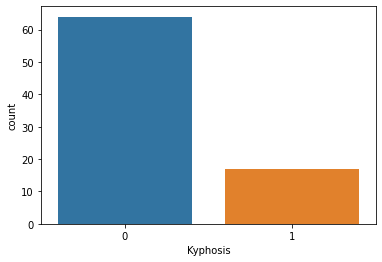

In [170]:
sns.countplot(df['Kyphosis'], label = "Count")

In [171]:
df.isnull().sum()

#no null data :) 

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

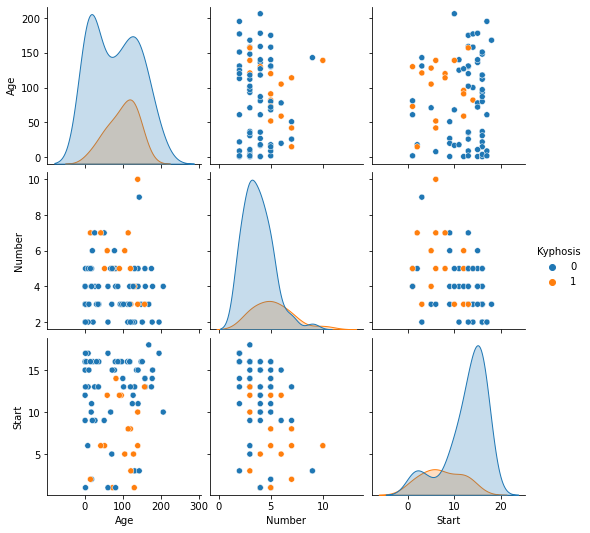

In [172]:
sns.pairplot(df, hue='Kyphosis', vars = ['Age', 'Number', 'Start'])

<AxesSubplot:>

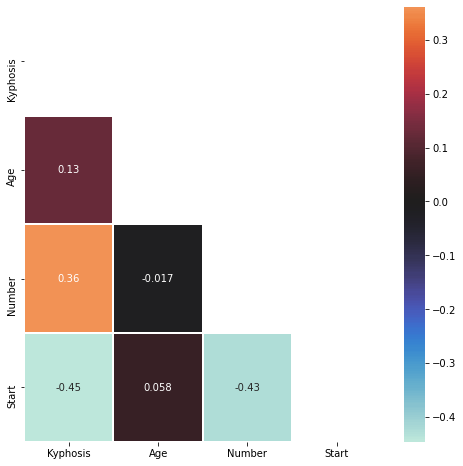

In [173]:
# Generate a mask for the upper triangle 
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8,8)) 
sns.heatmap(corr, mask=mask, center=0, linewidths=1, annot=True) 

#No high correlation between features. 

## Creating Train and Test Sets

In [174]:
y = df['Kyphosis']

In [175]:
X = df.drop(['Kyphosis'], axis=1)

In [176]:
y.shape

(81,)

In [177]:
X.shape

(81, 3)

In [178]:
## both X and y is created successfully

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1111)

In [181]:
X_train.shape

(60, 3)

In [182]:
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [183]:
# which feature are mor important in the model

feature_imp = pd.DataFrame(dt.feature_importances_, index=X_train.columns)

In [184]:
print(feature_imp)

#Age is the most important followed by Start adn Number. They all have high importancy in the models

               0
Age     0.368676
Number  0.254352
Start   0.376973


## Model Evaluation

In [185]:
from sklearn.metrics import classification_report, confusion_matrix

In [186]:
y_pred = dt.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

<AxesSubplot:>

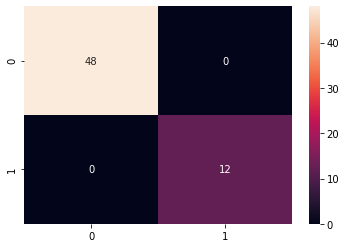

In [187]:
sns.heatmap(cm, annot=True)

In [188]:
y_pred_t = dt.predict(X_test)
cm_train = confusion_matrix(y_test, y_pred_t)

<AxesSubplot:>

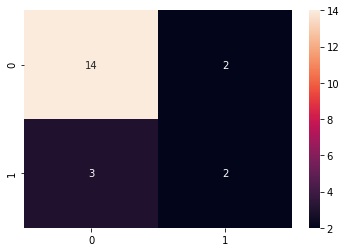

In [189]:
sns.heatmap(cm_train, annot=True)

In [190]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        12

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [191]:
print(classification_report(y_test, y_pred_t))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        16
           1       0.50      0.40      0.44         5

    accuracy                           0.76        21
   macro avg       0.66      0.64      0.65        21
weighted avg       0.75      0.76      0.75        21



In [192]:
## Training values are higher than testing values. So the model is overfit. It's too complex to explain the new data.

## We can't do feature selection or enginerring as the data is limited. 
## So the next option is trying other model and hyperparameter tuning

## Model Improvement

In [193]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=1111)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1111)

In [194]:
y_pred_train = rfc.predict(X_train)

<AxesSubplot:>

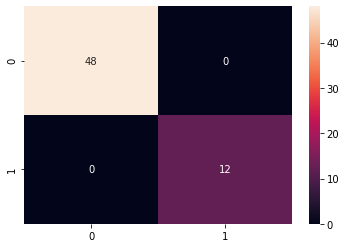

In [195]:
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True)

In [196]:
y_pred_test = rfc.predict(X_test)

<AxesSubplot:>

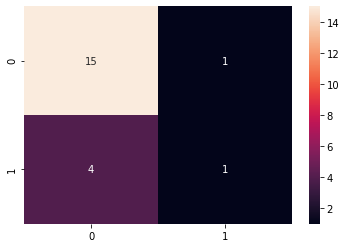

In [197]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

#The training model has high number of False negatives. So lets check scores. 

In [198]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        12

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [199]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        16
           1       0.50      0.20      0.29         5

    accuracy                           0.76        21
   macro avg       0.64      0.57      0.57        21
weighted avg       0.72      0.76      0.72        21



In [200]:
#Logistic Regression

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
lg = LogisticRegression(random_state=1111)

In [203]:
lg.fit(X_train, y_train)

LogisticRegression(random_state=1111)

In [204]:
y_pred_train = lg.predict(X_train)

<AxesSubplot:>

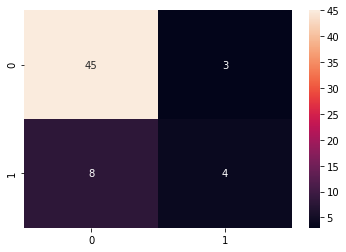

In [205]:
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True)

In [206]:
y_pred_test = lg.predict(X_test)

<AxesSubplot:>

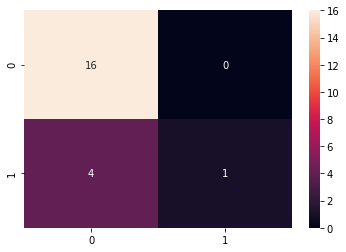

In [207]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

In [208]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        48
           1       0.57      0.33      0.42        12

    accuracy                           0.82        60
   macro avg       0.71      0.64      0.66        60
weighted avg       0.79      0.82      0.80        60



In [209]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.20      0.33         5

    accuracy                           0.81        21
   macro avg       0.90      0.60      0.61        21
weighted avg       0.85      0.81      0.76        21



## Result

Both the tree models were overfitting as they had high scores on train_sets and low values on test_sets. 
Logistic regression had a lower accuracy campared to other models but performed better on training set

#### The winner is Logistic Regression
